# 0\. pytorch 임포트

pytorch, numpy 차이 : GPU 지원여부

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch

torch.__version__

'2.1.0'

# 1\. Tensor

## 첫 텐서 만들기

In [2]:
# 요소 3개짜리 0으로 채워진 텐서[+]
a = torch.zeros(3)
a

tensor([0., 0., 0.])

In [3]:
# 0부터 시작하는 인덱스[+]
a[0], a[1]

(tensor(0.), tensor(0.))

In [4]:
# 값을 바꿀 수 있음[+]
a[2] = 5.0
a

tensor([0., 0., 5.])

In [5]:
# 리스트로 부터 텐서 만들기[+]
L = [1,2,3,4,5]
a = torch.tensor(L)
a

tensor([1, 2, 3, 4, 5])

In [6]:
# 텐서 사이즈[+]
np.array(L).shape, a.shape


((5,), torch.Size([5]))

In [7]:
# 다차원 텐서[+]
points_2d = torch.tensor([[1.3, 2.0],[4.5, 3.0],[2.5, 5.0]])
points_2d

tensor([[1.3000, 2.0000],
        [4.5000, 3.0000],
        [2.5000, 5.0000]])

In [8]:
# 다차원 인덱싱[+]
print(points_2d[0])
print(points_2d[0,1])

tensor([1.3000, 2.0000])
tensor(2.)


## 모양 바꾸기

In [9]:
a = torch.arange(1, 10)
a

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
a.reshape((3,3)) # a.reshape(3,3) 도 가능

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [11]:
torch.reshape(a, (3,3))

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

## 슬라이싱

In [12]:
a = torch.arange(1,11)
a

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [13]:
# 세번째 요소부터[+]
a[2:]

tensor([ 3,  4,  5,  6,  7,  8,  9, 10])

In [14]:
# 두번째부터 다섯번째 요소까지 또는 1번 인덱스에서 4번 인덱스 까지[+]
a[1:5]

tensor([2, 3, 4, 5])

In [15]:
# 다섯번째 요소까지[+]
a[:5]

tensor([1, 2, 3, 4, 5])

In [16]:
# 두개씩 건너뛰면서 [start:end:stride][+]
a[::2]

tensor([1, 3, 5, 7, 9])

In [17]:
# 음수인덱스[+]
a[-3:]

tensor([ 8,  9, 10])

## numpy와 함께쓰기

In [18]:
# ndarray to tensor[+]
na = np.array([1., 2., 3.])
print(na)
print(na.dtype) # float64


a = torch.from_numpy(na)
print(a)
# tensor([1., 2., 3.], dtype=torch.float64)

[1. 2. 3.]
float64
tensor([1., 2., 3.], dtype=torch.float64)


In [19]:
# tensor to ndarray[+]
a = torch.tensor([1.,2.,3.])
print(a)
print(a.dtype) # torch.float32

na = a.numpy()
print(na)

# 딥러닝 알고리즘은 소수점을 32bit를 기본형으로 한다.

tensor([1., 2., 3.])
torch.float32
[1. 2. 3.]


In [20]:
na = a.numpy() # Pandas : to_numpy()
print(na)

[1. 2. 3.]


In [21]:
na[0], a[0], type(na[0]), type(a[0]), a.ndim, a[0].ndim

# a.ndim : 1차원 , a[0].ndim : 0차원
# 숫자는 0차 텐서

(1.0, tensor(1.), numpy.float32, torch.Tensor, 1, 0)

In [22]:
# 텐서에서 숫자를 가져오려면?
a[0].item()

1.0

## 자주쓰는 tensor API

### `torch.cat()`

In [23]:
# cat()

a = torch.ones((3,))
b = torch.zeros((2,))

c = torch.cat((a,b), axis=0)
c

tensor([1., 1., 1., 0., 0.])

In [24]:
a = torch.ones((3,2))
b = torch.zeros((2,2))
c = torch.cat((a,b), axis=0)
c

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [0., 0.],
        [0., 0.]])

### `torch.stack()`

In [25]:
a = torch.ones((3,))
b = torch.zeros((3,))
c = torch.stack((a,b))
c

tensor([[1., 1., 1.],
        [0., 0., 0.]])

In [26]:
a = torch.ones((2,3))
b = torch.zeros((2,3))
c = torch.stack((a,b))
c

tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])

### `torch.max()`

In [27]:
torch.manual_seed(43)

a = torch.rand((2,5))
print(a)
print()

print(torch.max(a,axis=0))
print()

print(torch.max(a,axis=1))

tensor([[0.4540, 0.1965, 0.9210, 0.3462, 0.1481],
        [0.0858, 0.5909, 0.0659, 0.7476, 0.6253]])

torch.return_types.max(
values=tensor([0.4540, 0.5909, 0.9210, 0.7476, 0.6253]),
indices=tensor([0, 1, 0, 1, 1]))

torch.return_types.max(
values=tensor([0.9210, 0.7476]),
indices=tensor([2, 3]))


### `torch.argmax()`

In [28]:
torch.manual_seed(43)

a = torch.rand((2,5))
print(a)
print()

print(torch.argmax(a,axis=0))
print()

print(torch.argmax(a,axis=1))

tensor([[0.4540, 0.1965, 0.9210, 0.3462, 0.1481],
        [0.0858, 0.5909, 0.0659, 0.7476, 0.6253]])

tensor([0, 1, 0, 1, 1])

tensor([2, 3])


### `torch.squeeze()`

In [43]:
torch.manual_seed(43)

a = torch.rand(3,1)
print(a)
print(a.shape)
print()

a = a.squeeze()
print(a.squeeze()) # 1차원 텐서로 변환
print()
print(a.shape)

tensor([[0.4540],
        [0.1965],
        [0.9210]])
torch.Size([3, 1])

tensor([0.4540, 0.1965, 0.9210])

torch.Size([3])


# 2\. Automatic Differentiation

In [30]:
# 자동 미분 안되는 텐서
x = np.random.rand(6).reshape(2,3)
x_tensor = torch.tensor(x)

print(x_tensor.requires_grad)

False


In [31]:
# 자동 미분 가능한 텐서[+]
x = np.random.rand(6).reshape(2,3)
x_tensor = torch.tensor(x, requires_grad=True)

# requires_grad=True : 메모리에 계산과정을 자동으로 저장

print(x_tensor.requires_grad)

True


### grad

In [32]:
x = torch.tensor(1., requires_grad=True)
y = 2 * x + 3 # foward pass -> computational graph 생성
y # tensor(5., grad_fn=<AddBackward0>)

# x = torch.tensor(1., requires_grad=False)
# y = 2 * x + 3
# y # tensor(5.)

tensor(5., grad_fn=<AddBackward0>)

In [33]:
grad_of_y_wrt_x = torch.autograd.grad(y, x, # y를 x로 미분
                                      grad_outputs=torch.tensor(1),
                                      retain_graph=True)
# retain_graph=True 계산 그래프 남기기 -> False인 경우 다시 실행시 오류 발생

grad_of_y_wrt_x

(tensor(2.),)

In [34]:
# (2,2) 예제
x =  torch.rand((2,2), requires_grad=True)

def y(x):
    return 2 * x + 3

grad_of_y_wrt_x = torch.autograd.functional.jacobian(y, x) # automatic diff!
grad_of_y_wrt_x

tensor([[[[2., 0.],
          [0., 0.]],

         [[0., 2.],
          [0., 0.]]],


        [[[0., 0.],
          [2., 0.]],

         [[0., 0.],
          [0., 2.]]]])

In [35]:
# matrix*vector -> scalar 예제

# y = sum(w.x)
w = torch.rand( (2,3), requires_grad=True)
x = torch.rand( (3,1), requires_grad=True )

y = torch.mm(w, x).sum() # mm : 행렬 연산
y

tensor(1.8178, grad_fn=<SumBackward0>)

In [36]:
torch.autograd.grad(y, (w, x))

(tensor([[0.5335, 0.5375, 0.7058],
         [0.5335, 0.5375, 0.7058]]),
 tensor([[1.0051],
         [0.8814],
         [1.1444]]))

### backward

In [37]:
w.grad, x.grad
# (None, None)

(None, None)

In [38]:
y = torch.mm(w, x).sum()
y.backward()
w.grad, x.grad # 미분계수 확인

(tensor([[0.5335, 0.5375, 0.7058],
         [0.5335, 0.5375, 0.7058]]),
 tensor([[1.0051],
         [0.8814],
         [1.1444]]))

- `backward()` 사용시 `x`, `w`의 `grad`값을 계속 누적됨

In [39]:
x.grad.zero_(), w.grad.zero_()

(tensor([[0.],
         [0.],
         [0.]]),
 tensor([[0., 0., 0.],
         [0., 0., 0.]]))

In [40]:
y = torch.mm(w, x).sum()
x.grad.zero_(), w.grad.zero_()
y.backward()
w.grad, x.grad

(tensor([[0.5335, 0.5375, 0.7058],
         [0.5335, 0.5375, 0.7058]]),
 tensor([[1.0051],
         [0.8814],
         [1.1444]]))

# 3\.  Linear Regression with pytorch

In [41]:
!gdown 1aW3CdJVWMgPPXMoUZnU1c85jniC61Lnx

'gdown'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [42]:
D = np.load('basic_clfreg.npz')

X_reg = D['X_reg']
y_reg = D['y_reg']

X_reg.shape, y_reg.shape

FileNotFoundError: [Errno 2] No such file or directory: 'basic_clfreg.npz'

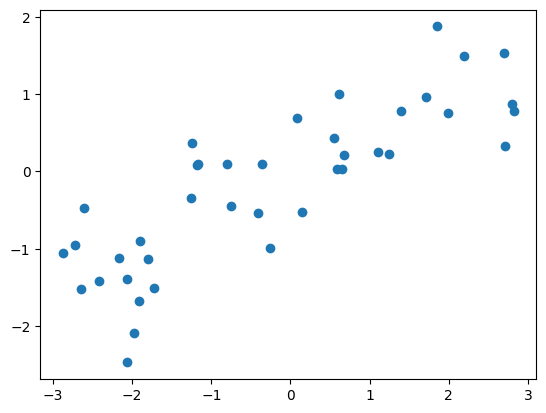

In [ ]:
plt.plot(X_reg, y_reg, 'o')
plt.show()

## Vanilla Version

- 가장 기본적인 형태로 선형회귀를 모델링합니다.

- 예전에 선형회귀 코드를 파이썬으로 작성하면서 최적화 부분을 `scipy.optmize.minimize()`를 사용했었는데 여기서는 파이토치의 자동미분 기능을 이용합니다.

- 그러기 위해 매개변수 `w0`, `w1`은 미분가능한 텐서가 되어야 합니다.

In [ ]:
torch.tensor(-2., requires_grad=True).item()

-2.0

In [ ]:
# 가장 기본적인 옵티마이제이션

# y = w_1*x + w_0

# 매개변수 w_0, w_1 정의
w_1 = torch.tensor(-2., requires_grad=True) #torch.rand(1, requires_grad=True)
w_0 = torch.tensor(0., requires_grad=True)  #torch.rand(1, requires_grad=True)
w_1_init = w_1.item()
w_0_init = w_0.item()

# X_reg, y_reg를 토치텐서로 바꾸기
X_reg_torch = torch.tensor(X_reg).squeeze() # (40, 1) -> (40, ) : 차원을 맞춤
y_reg_torch = torch.tensor(y_reg)

max_iter = 100
lr = 0.01 # 조금씩 최적점을 이동시키기 위한 보폭
          # 클수록 최적점으로 가는 폭이 크다

for i in range(max_iter):
    # zero grad
    if (w_1.grad is not None) and (w_0.grad is not None):
        w_1.grad.zero_()
        w_0.grad.zero_()

    # prediction
    y_pred = w_1 * X_reg_torch + w_0

    # loss
    loss = ((y_pred - y_reg_torch)**2).mean()

    # backward
    loss.backward() # w_0.grad, w_1.grad가 생김 (requires_grad=True 이므로)

    # update : backward를 통해 w1, w0 업데이트
    with torch.no_grad():
        w_1 -= lr*w_1.grad
        w_0 -= lr*w_0.grad

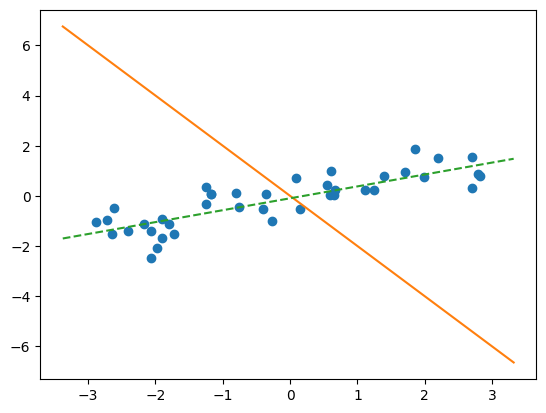

tensor(0.4745, requires_grad=True) tensor(-0.0947, requires_grad=True)


In [ ]:
fig = plt.figure()
ax = plt.axes()

eps = 0.5
x_min, x_max = X_reg.min() - eps, X_reg.max() + eps
x = np.linspace(x_min, x_max, 100)

ax.plot(X_reg, y_reg, 'o', label='train')
ax.plot(x, w_1_init*x + w_0_init)
ax.plot(x, w_1.item()*x + w_0.item(), '--')

plt.show()

print(w_1, w_0)

초기(실선)값 에서 최적화(점선)가 된 모습

## Using Pytorch Optimizer



### Optimizer
- 방금 직접 경사 하강법을 코딩했는데 여기서 제일 중요한 부분은 강하방향을 구하고 그것을 이용해서 변수를 업데이트 하는 부분입니다.

- 파이토치에서는 이런 코드까지 모두 구현해서 `torch.optim`으로 제공합니다.

- 이중 `SGD`, `Momentum`, `RmsProp`, `Adam`에 대해서 실험하겠습니다.

- https://www.ruder.io/optimizing-gradient-descent/

#### 테스트 함수

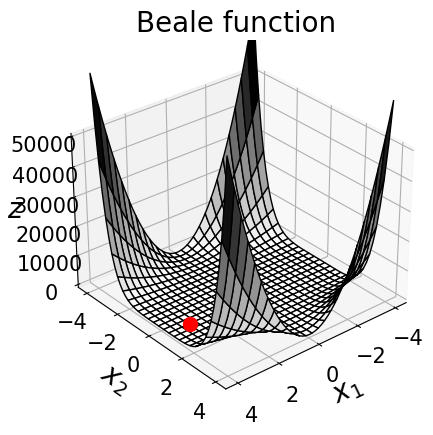

In [ ]:
def f3(X):
    return (1.5-X[0]+X[0]*X[1])**2 + (2.25-X[0]+X[0]*X[1]**2)**2 + (2.625-X[0]+X[0]*X[1]**3)**2


fig = plt.figure()
ax = plt.axes(projection="3d")

x1 = np.linspace(-4, 4, 51)
x2 = np.linspace(-4, 4, 51)
X1, X2 = np.meshgrid(x1, x2)
ax.plot_surface(X1, X2, f3([X1, X2]), cmap=plt.cm.binary, edgecolor="k")
ax.plot3D([3], [0.5], f3([3,0.5]), 'o', color='r', markersize=10, zorder=20)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.zaxis.set_tick_params(labelsize=15)
ax.set_zlim(0, 50000)
ax.set_xlabel(r'$x_1$', fontsize=20)
ax.set_ylabel(r'$x_2$', fontsize=20)
ax.set_zlabel(r'$z$', fontsize=20)
ax.set_title('Beale function', fontsize=20)
ax.view_init(30, 50)

#### 보조 학습 함수

In [ ]:
# 파이토치에서 제공하는 optim패키지를 쓸 때 필요한 반복코드를
# train이라는 이름으로 만들어 둔다.[+]
# 지금껏 만들어온 SDM, CGM같은 최적화 함수와 max_iter만큼 반복하면서
# 값을 업데이트한다는 내용은 거의 동일하나
# 다음과 같은 몇 가지 차이점이 있다.
# 1. 변수를 업데이트하는 방향(강하방향)과 방법을 결정하는 optimizer를 인자로 받는다.
# 2. 구체적인 변수 업데이트 방법은 optimizer.step()이라는 함수 내부로 가려진다.
# 3. 그래디언트를 구하는 과정이 함수값의 backward()로 대체되었다.
def train(f, x, optimizer, max_iter=1000, callback=None):
    for i in range(max_iter):
        # 최적화 스탭 순서
        # zero grad->function value->backward->step[+]

        # pytorch자동미분을 연속적으로 하게 되면 미분계수가 계속 누적되므로
        # 미분계수를 구하기전 그래디언트를 0으로 리셋한다.
        optimizer.zero_grad()

        # 함수의 포워드 패스
        fv = f(x)

        # 함수의 백워드 패스
        fv.backward()

        # 스탭이동 (앞의 w1, w0 업데이트와 같다)
        optimizer.step()

        if callback :
            callback(x)

#### SGD Stochastic Gradient Descent

In [ ]:
# 옵티마이저 생성[+]
x = torch.tensor([1.5, 1.8], requires_grad=True, dtype=torch.float64)

sgd = torch.optim.SGD([x], lr=0.001)

In [ ]:
# 학습[+]
path_sgd = [x.data.numpy().copy(), ]

def record_path(xk) :
    global path_sgd

    path_sgd.append(xk.detach().numpy().copy())

train(f3, x, optimizer=sgd, callback=record_path)

# f3는 아래와 같은 다항식
# def f3(X):
#     return (1.5-X[0]+X[0]*X[1])**2 + (2.25-X[0]+X[0]*X[1]**2)**2 + (2.625-X[0]+X[0]*X[1]**3)**2

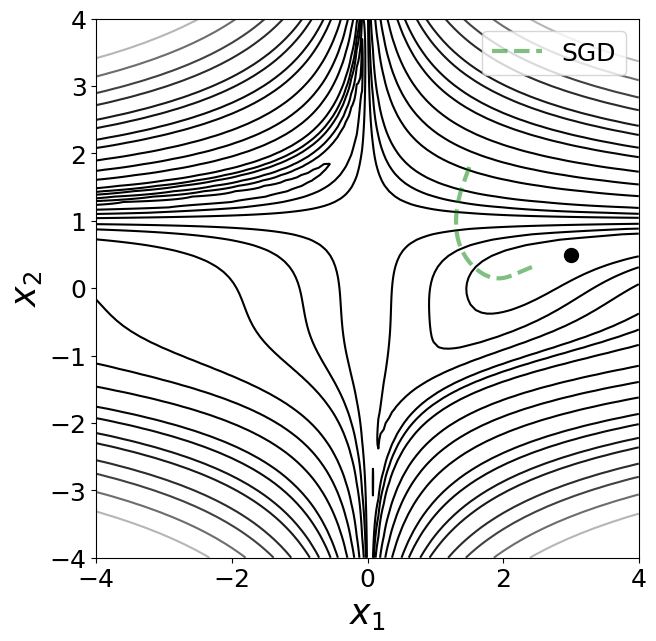

In [ ]:
# 경로 확인
fig = plt.figure(figsize=(7, 7))
ax = plt.axes()

path = np.array(path_sgd)

x1 = np.linspace(-4, 4, 101)
x2 = np.linspace(-4, 4, 101)
X1, X2 = np.meshgrid(x1, x2)

levels=[0, 2, 5, 10, 20, 30, 50, 120, 250, 500, 1000, 1500, 2500, 3500, 6000, 9000, 15000, 25000, 35000]
ax.contour(X1, X2, f3(np.array([X1,X2])), levels=levels, cmap=plt.cm.gray, linestyles="solid")
ax.plot([3], [0.5], 'o', c='k', markersize=10)
ax.plot(path[:,0], path[:,1], '--', lw=3, alpha=0.5, color='g', label='SGD')

ax.legend(fontsize=18)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel(r'$x_1$', fontsize=25)
ax.set_ylabel(r'$x_2$', fontsize=25)
ax.grid(False)

plt.show()

#### Momentum

In [ ]:
# 옵티마이저 생성[+]
x = torch.tensor([1.5, 1.8], requires_grad=True, dtype=torch.float64)

sgd = torch.optim.SGD([x], lr=0.001, momentum=0.9)
# 기존 SGD의 경우 방향전환이 직각..
# momentum 옵션 주는 경우 직각 + 기존 방향 (완전히 꺾이지 않게)

In [ ]:
# 학습[+]
path_momentum = [x.data.numpy().copy(), ]

def record_path(xk) :
    global path_momentum

    path_momentum.append(xk.detach().numpy().copy())

train(f3, x, optimizer=sgd, callback=record_path)

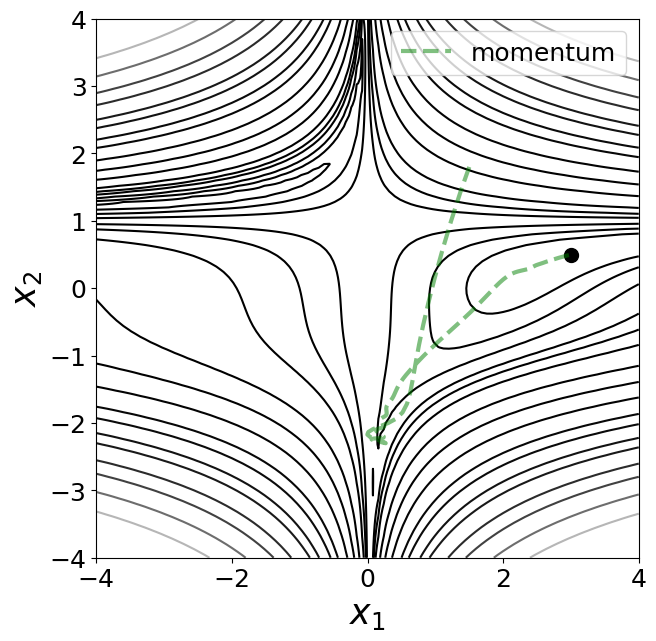

In [ ]:
# 경로 확인
fig = plt.figure(figsize=(7, 7))
ax = plt.axes()

path = np.array(path_momentum)

x1 = np.linspace(-4, 4, 101)
x2 = np.linspace(-4, 4, 101)
X1, X2 = np.meshgrid(x1, x2)

levels=[0, 2, 5, 10, 20, 30, 50, 120, 250, 500, 1000, 1500, 2500, 3500, 6000, 9000, 15000, 25000, 35000]
ax.contour(X1, X2, f3(np.array([X1,X2])), levels=levels, cmap=plt.cm.gray, linestyles="solid")
ax.plot([3], [0.5], 'o', c='k', markersize=10)
ax.plot(path[:,0], path[:,1], '--', lw=3, alpha=0.5, color='g', label='momentum')

ax.legend(fontsize=18)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel(r'$x_1$', fontsize=25)
ax.set_ylabel(r'$x_2$', fontsize=25)
ax.grid(False)

plt.show()

#### RMSprop

In [ ]:
# 옵티마이저 생성[+]
x = torch.tensor([1.5, 1.8], requires_grad=True, dtype=torch.float64)

#########################################
# WRITE YOUR CODE HERE
# torch.optim.RMSprop()을 pytorch 도움말에서 검색하여
# torch.optim.RMSprop()을 초기화하고 아래 셀을 수행하여
# 직접 만든 RMSprop()과 해찾기 경로를 비교
rmsprop = torch.optim.RMSprop([x], lr=0.01, alpha=0.99) # alpha: 기본값 0.99

In [ ]:
# 학습[+]
path_rmsprop = [x.data.numpy().copy(), ]

def record_path(xk) :
    global path_rmsprop

    path_rmsprop.append(xk.detach().numpy().copy())

train(f3, x, optimizer=rmsprop, callback=record_path)

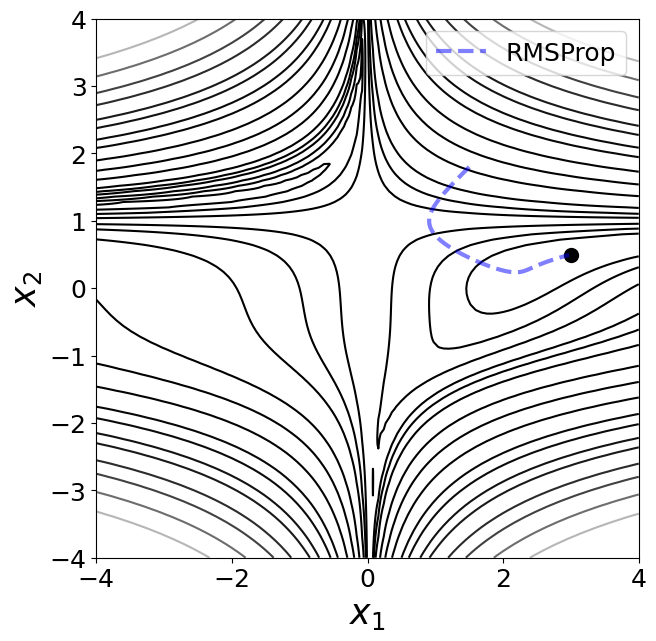

In [ ]:
# 경로 확인
fig = plt.figure(figsize=(7, 7))
ax = plt.axes()

path = np.array(path_rmsprop)

x1 = np.linspace(-4, 4, 101)
x2 = np.linspace(-4, 4, 101)
X1, X2 = np.meshgrid(x1, x2)

levels=[0, 2, 5, 10, 20, 30, 50, 120, 250, 500, 1000, 1500, 2500, 3500, 6000, 9000, 15000, 25000, 35000]
ax.contour(X1, X2, f3(np.array([X1,X2])), levels=levels, cmap=plt.cm.gray, linestyles="solid")
ax.plot([3], [0.5], 'o', c='k', markersize=10)
ax.plot(path[:,0], path[:,1], '--', lw=3, alpha=0.5, color='b', label='RMSProp')

ax.legend(fontsize=18)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel(r'$x_1$', fontsize=25)
ax.set_ylabel(r'$x_2$', fontsize=25)
ax.grid(False)

plt.show()

#### Adam

In [ ]:
# 옵티마이저 생성[+]
x = torch.tensor([1.5, 1.8], requires_grad=True, dtype=torch.float64)

#########################################
# WRITE YOUR CODE HERE
# torch.optim.Adam()을 pytorch 도움교에서 검색하여
# torch.optim.Adam()을 초기화하고 아래 셀을 수행하여
# 직접 만든 Adam()과 해찾기 경로를 비교
adam = torch.optim.Adam([x], lr=0.01, betas=(0.9, 0.99))

In [ ]:
# 학습[+]
path_adam = [x.data.numpy().copy(), ]

def record_path(xk) :
    global path_adam

    path_adam.append(xk.detach().numpy().copy())

train(f3, x, optimizer=adam, callback=record_path)

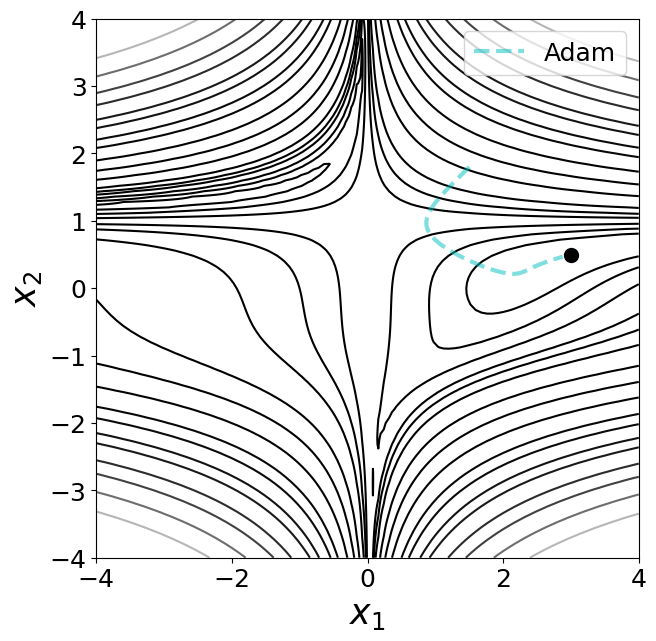

In [ ]:
# 경로 확인
fig = plt.figure(figsize=(7, 7))
ax = plt.axes()

path = np.array(path_adam)

x1 = np.linspace(-4, 4, 101)
x2 = np.linspace(-4, 4, 101)
X1, X2 = np.meshgrid(x1, x2)

levels=[0, 2, 5, 10, 20, 30, 50, 120, 250, 500, 1000, 1500, 2500, 3500, 6000, 9000, 15000, 25000, 35000]
ax.contour(X1, X2, f3(np.array([X1,X2])), levels=levels, cmap=plt.cm.gray, linestyles="solid")
ax.plot([3], [0.5], 'o', c='k', markersize=10)
ax.plot(path[:,0], path[:,1], '--', lw=3, alpha=0.5, color='c', label='Adam')

ax.legend(fontsize=18)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel(r'$x_1$', fontsize=25)
ax.set_ylabel(r'$x_2$', fontsize=25)
ax.grid(False)

plt.show()

- 옵티마이저 사용법이 이해되었다면 스탭이동하는 부분을 `torch.optim.SGD`로 바꿔보겠습니다.

In [ ]:
# 위 vanilla 코드를 옵티마이저를 사용하는 코드로 변경

w_1 = torch.tensor(-2., requires_grad=True) #torch.rand(1, requires_grad=True)
w_0 = torch.tensor(0., requires_grad=True)  #torch.rand(1, requires_grad=True)
w_1_init = w_1.item()
w_0_init = w_0.item()

X_reg_torch = torch.tensor(X_reg).squeeze()
y_reg_torch = torch.tensor(y_reg)

max_iter = 100
lr = 0.01

# 여기 옵티마이저를 정의 한다.
optimizer = torch.optim.SGD([w_1, w_0], lr=lr)
            # w_1, w_0를 최적화 한다.


for i in range(max_iter):
    optimizer.zero_grad() # w_1, w_0의 grad 초기화

    y_pred = w_1 * X_reg_torch + w_0
    loss = ((y_pred - y_reg_torch)**2).mean()
    loss.backward()

    # 여기서 옵티마이저를 이용한 스탭이동
    optimizer.step()

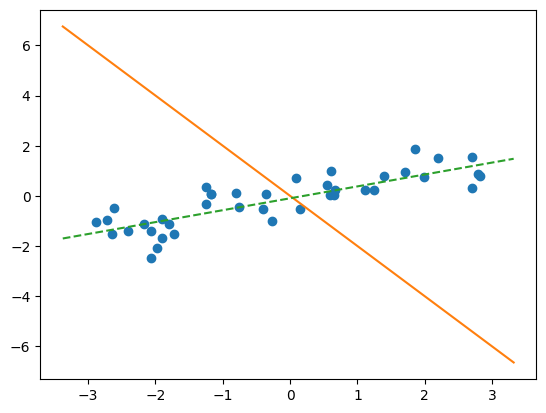

tensor(0.4745, requires_grad=True) tensor(-0.0947, requires_grad=True)


In [ ]:
fig = plt.figure()
ax = plt.axes()

eps = 0.5
x_min, x_max = X_reg.min() - eps, X_reg.max() + eps
x = np.linspace(x_min, x_max, 100)

ax.plot(X_reg, y_reg, 'o', label='train')
ax.plot(x, w_1_init*x + w_0_init)
ax.plot(x, w_1.item()*x + w_0.item(), '--')

plt.show()

print(w_1, w_0)

## Using Pytorch Optimizer and Loss

- 위 버전까지 성공했다면 이제 손실함수를 계산하는 부분까지 파이토치에서 제공하는 `torch.nn.MSELoss()`로 교체합니다.

- 먼저 클래스를 임포트 합니다.

- 임포트한 클래스는 옵티마이저처럼 독립적으로 객체화되어 다음처럼 MSE 로스 값을 계산할 수 있습니다.
```python
# MSELoss 객체 생성
mse_loss = torch.nn.MSELoss()
# 예제 ground truth와 예측 값
ground_truth = torch.tensor([[1.0, 1.0], [2.0, 2.0]])
predictions = torch.tensor([[1.2, 0.8], [1.8, 2.1]])
# 손실 값 계산
loss_value = mse_loss(predictions, ground_truth)
```

- 위 방식대로 코드를 최종적으로 수정한 버전입니다.

In [ ]:
# 로스함수까지 변경

w_1 = torch.tensor(-2., requires_grad=True) #torch.rand(1, requires_grad=True)
w_0 = torch.tensor(0., requires_grad=True)  #torch.rand(1, requires_grad=True)
w_1_init = w_1.item()
w_0_init = w_0.item()

X_reg_torch = torch.tensor(X_reg).squeeze()
y_reg_torch = torch.tensor(y_reg)

max_iter = 100
lr = 0.01

# 여기 옵티마이저를 정의 한다.
optimizer = torch.optim.SGD([w_1, w_0], lr=0.01)

# 여기 로스를 정의 한다.
criterion = torch.nn.MSELoss()

for i in range(max_iter):
    optimizer.zero_grad()

    y_pred = w_1 * X_reg_torch + w_0

    # 로스 계산하는 부분이 사라졌음
    loss = criterion(y_pred, y_reg_torch)

    loss.backward()

    # 여기서 옵티마이저를 이용한 스탭이동
    optimizer.step()

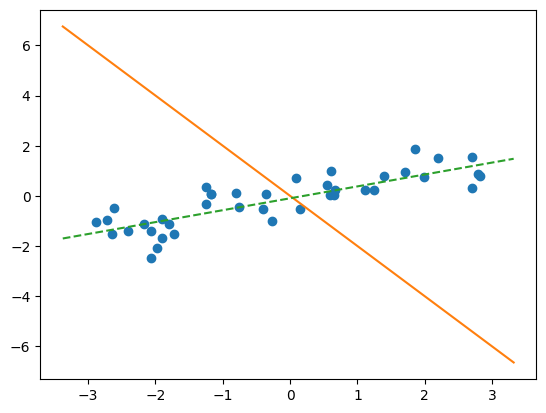

tensor(0.4745, requires_grad=True) tensor(-0.0947, requires_grad=True)


In [ ]:
fig = plt.figure()
ax = plt.axes()

eps = 0.5
x_min, x_max = X_reg.min() - eps, X_reg.max() + eps
x = np.linspace(x_min, x_max, 100)

ax.plot(X_reg, y_reg, 'o', label='train')
ax.plot(x, w_1_init*x + w_0_init)
ax.plot(x, w_1.item()*x + w_0.item(), '--')

plt.show()

print(w_1, w_0)

# 4\. The basic building blocks for graphs: torcn.nn

- 모델이라는 것은 결국 함수이기 때문에 함수를 정의하기 위해 파이토치에서 제공하는 기본 단위 클래스를 이용하게 됩니다.

- 여기서는 가장 기본적인 `Linear`, `Sigmoid`, `ReLU`를 실험해봅니다.

- 이미 알고 있지만 이 세 구성 요소만 있으면 훌륭하게 뉴럴네트워크를 정의 할 수 있습니다.

## Linear

In [ ]:
# Linear 레이어 실험[+]
linear = torch.nn.Linear(5, 1) # 5개 입력, 1개 출력
print(linear.weight) # weight는 무작위로 생성
print(linear.bias)

Parameter containing:
tensor([[ 0.2023, -0.1574,  0.3481, -0.3293,  0.3018]], requires_grad=True)
Parameter containing:
tensor([0.0559], requires_grad=True)


In [ ]:
# layer이용[+]
x = torch.rand(5)
print(x)

with torch.no_grad():
    print(linear(x))

tensor([0.4138, 0.8621, 0.2793, 0.5834, 0.3287])
tensor([0.0083])


In [ ]:
# 함수형태[+]
torch.nn.functional.linear(x, weight=linear.weight, bias=linear.bias)

tensor([0.0083], grad_fn=<ViewBackward0>)

## Sigmoid

In [ ]:
# Sigmoid 레이어 실험[+]
sigma = torch.nn.Sigmoid()
sigma(torch.tensor(0))

tensor(0.5000)

In [ ]:
# 함수형태[+]
torch.nn.functional.sigmoid(torch.tensor(0))

tensor(0.5000)

## ReLU

In [ ]:
# 레이어[+]
relu = torch.nn.ReLU()
x = torch.randn(5)
relu(x)

tensor([0.0000, 0.4680, 2.2700, 0.0743, 0.0000])

In [ ]:
# 함수형태[+]
torch.nn.functional.relu(x)

tensor([0.0000, 0.4680, 2.2700, 0.0743, 0.0000])

## Model

- 이렇게 기본 구성 요소에 대해서 실험을 했습니다.

- 이제 이 요소들을 묶어서 함수 역할을 하는 모델을 만들어야 합니다.

- 구성 요소들을 묵는데 `Sequential`과 클래스를 이용하는 방법이 있습니다.

### Sequential 모델

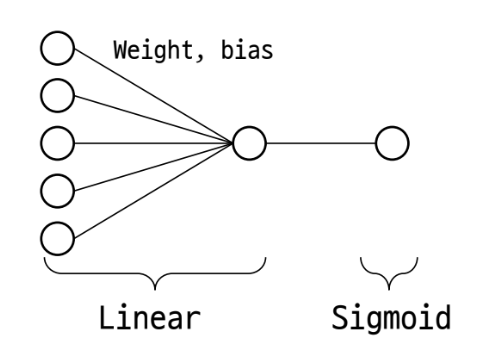

In [ ]:
# sequential 모델[+]
# 위와같은 Linear, Sigmoid를 한번에 정의
# 수많은 층을 적층시켜 학습시킬 수 있다.
model = torch.nn.Sequential(
    torch.nn.Linear(5,1),
    torch.nn.Sigmoid()
)

In [ ]:
# 모델 내부에 매개변수 확인
L = list(model.parameters())
# type(L[0])
print(L)

[Parameter containing:
tensor([[ 0.1400,  0.1646, -0.1351, -0.3608, -0.3451]], requires_grad=True), Parameter containing:
tensor([0.2695], requires_grad=True)]


In [ ]:
# forward test
x = torch.tensor([[0,1,2,3,4],
                  [5,6,7,8,9]], dtype=torch.float32)
model(x)

tensor([[0.6577],
        [0.3574]], grad_fn=<SigmoidBackward0>)

## Train Model using Pytorch Optimizer, Loss

- 이제 `pytorch`에서 제공하는 모든 기능을 이용해서 앞서 실습한 선형회귀 모델을 다시 만들어보겠습니다.

- 이전 `Using Pytorch Optimizer and Loss`절에서 만들었던 코드에 계산식을 시퀀셜 모델로 변경합니다.




In [ ]:
# 로스함수까지 변경
torch.random.manual_seed(11)

X_reg_torch = torch.tensor(X_reg, dtype=torch.float32)
y_reg_torch = torch.tensor(y_reg, dtype=torch.float32)

max_iter = 100
lr = 0.01

# 모델을 정의합니다.
model =

# 여기 로스를 정의 한다.
criterion =

# 여기 옵티마이저를 정의 한다.
optimizer =

# 모델의 초기 가중치를 복사
w_1_init = 0
w_0_init = 0
for name, param in model.named_parameters():
    if 'weight' in name:
        w_1_init = param.clone()
    elif 'bias' in name:
        w_0_init = param.clone()

for i in range(max_iter):
    # zero grad


    # 모델 포워드


    # 로스 계산


    # 백 워드


    # 스탭이동


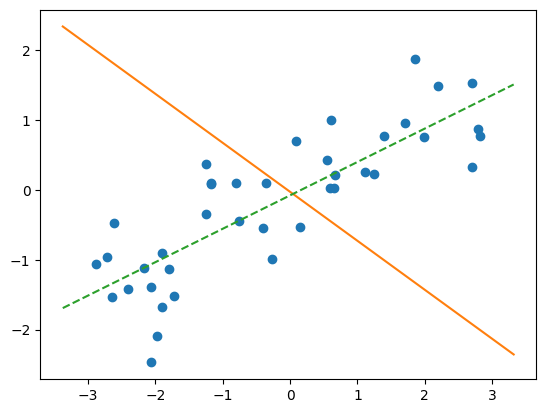

[Parameter containing:
tensor([[0.4786]], requires_grad=True), Parameter containing:
tensor([-0.0768], requires_grad=True)]


In [ ]:
fig = plt.figure()
ax = plt.axes()

eps = 0.5
x_min, x_max = X_reg.min() - eps, X_reg.max() + eps
x = np.linspace(x_min, x_max, 100).astype(np.float32)

ax.plot(X_reg, y_reg, 'o', label='train')
ax.plot(x, w_1_init[0].detach().numpy()*x + w_0_init.detach().numpy())
ax.plot(x, model(torch.tensor(x).reshape(-1,1)).detach().numpy(), '--')
plt.show()

print(list(model.parameters()))

# 5 연습: 1-Softmax Regression

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

Image Data Shape (1797, 64)
Label Data Shape (1797,)


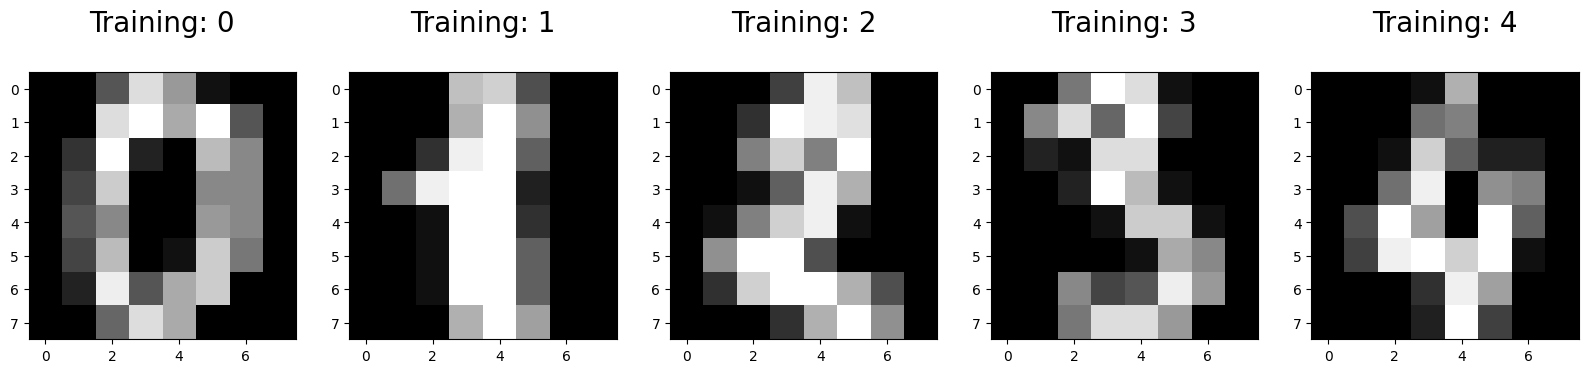

In [ ]:
# 숫자 데이터 로드
digits = load_digits()

# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

# 처음 5개를 그려본다.
fig = plt.figure(figsize=(20,5))

for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    ax = fig.add_subplot(1, 5, index + 1)
    ax.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    ax.set_title('Training: %i\n' % label, fontsize = 20)

plt.show()

In [ ]:
# 데이터를 학습세트와 테스트세트로 나눈다. 테스트 세트는 전체의 25%정도로 지정
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                    test_size=0.25, random_state=0)

# 0~1로 노멀라이즈
X_train = x_train / x_train.max()
X_test  = x_test  / x_test.max()

In [ ]:
# set data
# 학습 및 테스트 데이터를 파이토치 텐서로 변환
X_train_torch = torch.tensor(X_train, dtype=torch.float)
y_train_torch = torch.tensor(y_train, dtype=torch.long)

X_test_torch = torch.tensor(X_test, dtype=torch.float)
y_test_torch = torch.tensor(y_test, dtype=torch.long)


- 파이토치로 소프트맥스 회귀를 구성합니다.

- 모델은 숫자 64개를 입력받고 숫자 10개를 출력해야 합니다.

- 모델의 끝 부분에 그 모델에 알맞는 출력층 활성함수와 로스함수를 지정하면 됩니다.

- 아래 셀을 완성하면서 출력층 활성함수와 로스 함수의 짝을 맞추는 연습을 해보겠습니다.

- 우선 지금 만드는 모델에서 마지막 출력층은 다음처럼 정의된 `torch.nn.LogSoftmax()`를 사용합니다.

$$
\text{LogSoftmax}(\mathbf{x}_i) = \log \left( \frac{\exp(\mathbf{x}_i)}{\sum_j \exp(\mathbf{x}_j)} \right)
$$

- 소프트맥스 함수와 로그 함수를 별도로 지정하지 않고 한번에 지정하는 이유는 수치적 불안정성을 막기 위함입니다.

In [ ]:
torch.manual_seed(0)

######################################
# WRITE YOUR CDDE HERE
# torch.nn.Sequential( ) 내부를 슬라이드에 제시된 모형으로
# 완성하기
# Linear()와 출력층 활성함수로 구성되는데
# 여기서는 마지막 출력층 활성함수로 torch.nn.LogSoftmax()를 사용하기
# LogSoftmax는 마지막 출력에 소프트맥스를 취하고 로그까지 적용해서
# 출력값을 생성하는 레이어
# 도움말: https://pytorch.org/docs/1.13/generated/torch.nn.LogSoftmax.html#torch.nn.LogSoftmax

# model define[*]
model_softmax = torch.nn.Sequential(
    # 최종 출력이 10개인 리니어 모델
    torch.nn.Linear(   ,    ),

    # (N,C)로 출력된 출력에 마지막 축에 대해서 로그소프트맥스 적용
    # N은 샘플수, C는 클래스 수

)

In [ ]:
# forward test, 10개 값이 약 log(1/10) = -2.3 근처로 찍혀야 함
model_softmax(X_train_torch[0])

tensor([-2.9485, -2.0332, -2.2780, -2.8124, -2.2309, -2.0421, -2.2584, -2.0855,
        -2.6337, -2.1510], grad_fn=<LogSoftmaxBackward0>)

- 다음 단계로 로스 함수와 옵티마이저를 설정합니다.

- 모델을 정의할 때 마지막 출력에 소프트맥스와 로그를 모두 적용했기 때문에 다클래스 분류 문제에서 손실함수로 쓰는 아래 크로스 엔트로피 함수에서 $ \log\left(a^{(L)}_{ij}\right)$ 부분이 이미 계산되어져 있습니다.

$$
\text{Loss}(\mathbf{w}) = - \sum_i^N \sum_j^K y_{ij} \log\left(a^{(L)}_{ij}\right)
$$

- 따라서 여기서는 모델의 출력값에 $-\sum_i \sum_j y_{ij}$ 부분만 적용하면 손실함수 값을 구할 수 있는데 그것을 해주는 레이어가 `torch.nn.NLLLoss()`입니다.

- `torch.nn.NLLLoss()`를 정의할 때 $-\sum_i$를 실행하기 위해 `reduction='sum'`으로 설정합니다.

In [ ]:
######################################
# WRITE YOUR CDDE HERE
# 로스함수로 NLLLoss, 옵티마이저로 SGD를 사용하여
# loss_fn, sgd를 초기화 하기

# loss and optimizer [*]
loss_fn = torch.nn.NLLLoss(reduction='sum')
sgd = torch.optim.SGD(model_softmax.parameters(), lr=0.001)

In [ ]:
# model을 학습시키기 위한 함수
def train_model(model, X, y, loss_fn, optimizer,
                X_valid=None, y_valid=None, max_iter=1000):
    # 학습중 손실함수값과 모델의 퍼포먼스를 저장할 사전
    history = {
        'loss':[], 'val_loss':[],
        'accuracy':[], 'val_accuracy':[]
    }

    for i in range(max_iter):
        output = ""
        # 최적화 5 스탭 순서
        # zero grad->network func.->loss func.->loss backward->step[+]
        optimizer.zero_grad()
        y_pred = model(X)
        loss = loss_fn(y_pred, y) # [주의] pred가 앞이고 truth가 뒤
        loss.backward()

        # 여기서 모델을 평가
        # 이 with문 안에서 그래디언트 추적을 멈춤
        with torch.no_grad():
            # train 데이터에 대해서
            # train loss를 저장
            # 직전에 구한 손실함숫값을 샘플수로 나눠서 정확도 계산
            history['loss'].append(loss.item() / X.shape[0])

            # train accuracy를 저장
            # 10클래스 분류 문제에 적합한 accuracy 구하는 코드를 직접 작성
            # (N,C)에서 C방향으로 제일 큰 인덱스를 알아내고
            max_value, predicted = torch.max(y_pred, axis=1)
            # 타겟 y와 똑같은 갯수를 구함
            correct = (predicted == y).sum().item()
            # 전체 샘플 수로 나눠서 정확도 계산
            history['accuracy'].append(correct / X.shape[0])

            # train 데이터에 대한 보고 문장
            output += f"Epoch {i+1:{len(str(max_iter))}}/{max_iter} - loss: {history['loss'][-1]:.4f} - accuracy: {history['accuracy'][-1]:.4f}"

            # valid 데이터에 대해서
            if X_valid != None and y_valid != None:
                # valid loss를 저장
                # X_valid를 모델에 입력하고 valid 데이터에 대한 결과를 얻음
                y_pred_valid = model(X_valid)
                val_loss = loss_fn(y_pred_valid, y_valid)
                history['val_loss'].append(val_loss.item() / X_valid.shape[0])

                # valid acc.를 저장
                max_value, predicted = torch.max(y_pred_valid, axis=1)
                correct = (predicted == y_valid).sum().item()
                history['val_accuracy'].append(correct / X_valid.shape[0])

                # valid 데이터에 대한 보고 문장
                output += f" - val_loss: {history['val_loss'][-1]:.4f} - val_accuracy: {history['val_accuracy'][-1]:.4f}"

        optimizer.step()

        print(output)

    return history


In [ ]:
# train
hist = train_model(model_softmax, X_train_torch, y_train_torch, loss_fn, sgd,
            X_test_torch, y_test_torch, max_iter=100)

Epoch   1/100 - loss: 2.3472 - accuracy: 0.1002 - val_loss: 2.3299 - val_accuracy: 0.1111
Epoch   2/100 - loss: 2.0572 - accuracy: 0.4128 - val_loss: 2.0770 - val_accuracy: 0.3933
Epoch   3/100 - loss: 1.8198 - accuracy: 0.7558 - val_loss: 1.8368 - val_accuracy: 0.7489
Epoch   4/100 - loss: 1.6287 - accuracy: 0.8151 - val_loss: 1.6568 - val_accuracy: 0.7822
Epoch   5/100 - loss: 1.4685 - accuracy: 0.8523 - val_loss: 1.4980 - val_accuracy: 0.8356
Epoch   6/100 - loss: 1.3341 - accuracy: 0.8812 - val_loss: 1.3677 - val_accuracy: 0.8489
Epoch   7/100 - loss: 1.2208 - accuracy: 0.8931 - val_loss: 1.2558 - val_accuracy: 0.8533
Epoch   8/100 - loss: 1.1251 - accuracy: 0.8990 - val_loss: 1.1616 - val_accuracy: 0.8733
Epoch   9/100 - loss: 1.0436 - accuracy: 0.9035 - val_loss: 1.0808 - val_accuracy: 0.8822
Epoch  10/100 - loss: 0.9738 - accuracy: 0.9065 - val_loss: 1.0115 - val_accuracy: 0.8956
Epoch  11/100 - loss: 0.9135 - accuracy: 0.9087 - val_loss: 0.9515 - val_accuracy: 0.9000
Epoch  12/

In [ ]:
y_preds_train = model_softmax(X_train_torch)
y_preds_train = torch.argmax(y_preds_train, axis=1).numpy()

# 테스트 세트에 대해 예측하고 평가한다.
y_preds = model_softmax(X_test_torch)
y_preds = torch.argmax(y_preds, axis=1).numpy()

i = 0
j = 0
cm = np.zeros((10,10))

for y_label, y_pred in zip(y_test, y_preds):
    cm[y_label][y_pred] += 1
    i+=1


print("Train accuracy : {:f}".format( (y_train.shape[0]-(y_train != y_preds_train).sum()) / y_train.shape[0]) )
print("Test  accuracy : {:f}".format( (y_test.shape[0]-(y_test != y_preds).sum()) / y_test.shape[0]) )
print(cm)


Train accuracy : 0.956199
Test  accuracy : 0.944444
[[37.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 39.  0.  0.  0.  1.  1.  0.  0.  2.]
 [ 0.  0. 42.  1.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1. 40.  0.  0.  0.  1.  2.  1.]
 [ 0.  0.  0.  0. 36.  0.  0.  2.  0.  0.]
 [ 0.  0.  0.  0.  0. 47.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  0.  0. 51.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 48.  0.  0.]
 [ 0.  4.  1.  0.  0.  1.  0.  1. 41.  0.]
 [ 0.  0.  0.  0.  0.  2.  0.  0.  1. 44.]]


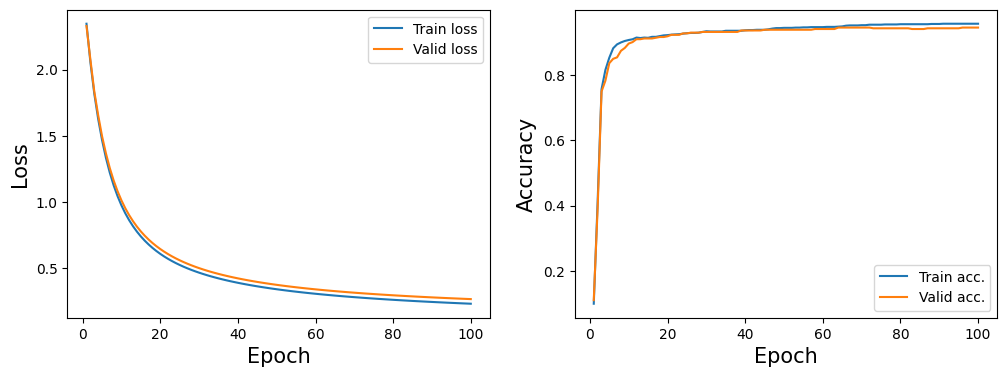

In [ ]:
# 로스,  정확도 시각화

x = np.linspace(1, len(hist['loss']), len(hist['loss']))

fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=2)

# ax[0].plot(x, hist['loss'], '-o', label='Train loss')
# ax[0].plot(x, hist['val_loss'], '--<', label='Valid loss')
ax[0].plot(x, hist['loss'], label='Train loss')
ax[0].plot(x, hist['val_loss'], label='Valid loss')
ax[0].set_xlabel('Epoch', size=15)
ax[0].set_ylabel('Loss', size=15)
ax[0].legend()

# ax[1].plot(x, hist['accuracy'], '-o', label='Train acc.')
# ax[1].plot(x, hist['val_accuracy'], '--<', label='Valid acc.')
ax[1].plot(x, hist['accuracy'], label='Train acc.')
ax[1].plot(x, hist['val_accuracy'], label='Valid acc.')
ax[1].set_xlabel('Epoch', size=15)
ax[1].set_ylabel('Accuracy', size=15)
ax[1].legend()

plt.show()